<a href="https://colab.research.google.com/github/pastrop/kaggle/blob/master/Tokenization_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenization

In [ ]:
import nltk
from nltk.tokenize import(TreebankWordTokenizer,
                          TweetTokenizer,
                          MWETokenizer)

In [ ]:
#Create tokenizers:
tree = TreebankWordTokenizer()
tweet = TweetTokenizer()
mwe = MWETokenizer()

# Create a string input
sent1 = 'There are more things in heaven and earth, Horatio, than are dreamt of in your philosophy'
     
# Use tokenize method
print(f'Treebank -> {tree.tokenize(sent1)}')
print(f'Tweettokenizer -> {tweet.tokenize(sent1)}')
print(f'MWEtokenizer -> {mwe.tokenize(sent1)}')

Treebank -> ['There', 'are', 'more', 'things', 'in', 'heaven', 'and', 'earth', ',', 'Horatio', ',', 'than', 'are', 'dreamt', 'of', 'in', 'your', 'philosophy']
Tweettokenizer -> ['There', 'are', 'more', 'things', 'in', 'heaven', 'and', 'earth', ',', 'Horatio', ',', 'than', 'are', 'dreamt', 'of', 'in', 'your', 'philosophy']
MWEtokenizer -> ['T', 'h', 'e', 'r', 'e', ' ', 'a', 'r', 'e', ' ', 'm', 'o', 'r', 'e', ' ', 't', 'h', 'i', 'n', 'g', 's', ' ', 'i', 'n', ' ', 'h', 'e', 'a', 'v', 'e', 'n', ' ', 'a', 'n', 'd', ' ', 'e', 'a', 'r', 't', 'h', ',', ' ', 'H', 'o', 'r', 'a', 't', 'i', 'o', ',', ' ', 't', 'h', 'a', 'n', ' ', 'a', 'r', 'e', ' ', 'd', 'r', 'e', 'a', 'm', 't', ' ', 'o', 'f', ' ', 'i', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 'p', 'h', 'i', 'l', 'o', 's', 'o', 'p', 'h', 'y']


**Neural Nets**

In [ ]:
#This is a tokenization example while working with neural nets.  Info only,  this is not directly applicable to the current use case:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
sent2 = "Mary had a little lumb and, according to GPT3, ate it with the mint jelly"
encoded_input = tokenizer(sent2)
print(encoded_input.input_ids)

[101, 2090, 1125, 170, 1376, 181, 1818, 1830, 1105, 117, 2452, 1106, 15175, 1942, 1495, 117, 8756, 1122, 1114, 1103, 22532, 179, 23083, 102]


In [ ]:
!pip install -U spacy

In [2]:
import spacy
from termcolor import colored

In [3]:
spacy.cli.info()

{'location': '/usr/local/lib/python3.7/dist-packages/spacy',
 'pipelines': {},
 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic',
 'python_version': '3.7.12',
 'spacy_version': '3.1.3'}

In [ ]:
spacy.cli.download('en_core_web_sm')
nlp_sm = spacy.load('en_core_web_sm')

In [ ]:
spacy.cli.download('fr_core_news_sm')
nlp_sm = spacy.load('fr_core_news_sm')

✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [7]:
spacy.cli.download('xx_sent_ud_sm')
nlp_sm = spacy.load('xx_sent_ud_sm')

✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')


In [8]:
nlp_sm.meta['version']

'3.1.0'

In [ ]:
#spacy custom tokenizer
from spacy.tokenizer import Tokenizer
from spacy.lang.char_classes import ALPHA, ALPHA_LOWER, ALPHA_UPPER, CONCAT_QUOTES, LIST_ELLIPSES, LIST_ICONS
from spacy.util import compile_infix_regex
#from spacy.attrs import ORTH, NORM

def custom_tokenizer(nlp):
    infixes = (
        LIST_ELLIPSES
        + LIST_ICONS
        + [
            r"(?<=[0-9])[+\-\*^](?=[0-9-])",
            r"(?<=[{al}{q}])\.(?=[{au}{q}])".format(
                al=ALPHA_LOWER, au=ALPHA_UPPER, q=CONCAT_QUOTES
            ),
            r"(?<=[{a}]),(?=[{a}])".format(a=ALPHA),
            #r"(?<=[{a}])(?:{h})(?=[{a}])".format(a=ALPHA, h=HYPHENS),
            r"(?<=[{a}0-9])[:<>=/](?=[{a}])".format(a=ALPHA),
        ]
    )

    infix_re = compile_infix_regex(infixes)
    #infix_re = spacy.util.compile_infix_regex(infixes)

    return Tokenizer(nlp.vocab, prefix_search=nlp.tokenizer.prefix_search,
                                suffix_search=nlp.tokenizer.suffix_search,
                                infix_finditer=infix_re.finditer,
                                token_match=nlp.tokenizer.token_match,
                                rules=nlp.Defaults.tokenizer_exceptions)


nlp_sm.tokenizer = custom_tokenizer(nlp_sm)

In [ ]:
case = [{ORTH: "won't", NORM: "will not"}]
nlp_sm.tokenizer.add_special_case("won't", case)

In [ ]:
import spacy.cli

In [ ]:
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
spacy.cli.download('en_core_web_sm')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
nlp_lg = spacy.load('en_core_web_lg')

In [ ]:
nlp_trf = spacy.load("en_core_web_trf")

In [ ]:
st = ['Make it so we can hide and unhide the carousel',
      'Mary had a little lamb and, according to GPT3, ate it with the mint jelly',
      '-The well-tested code',
      "I'M GONNA PUKE",
      'Much sleeker. Very attractive!..I would strongly recommend',
      'CoughROOTCough',
      "So...I'm very happy",
      'A starling among starlings',
      'It was a love-fest',
      "It's great!",
      'Kindle-Fire is on fire',
      "Mother-in-law loves riding mary-go-around while watching primHD",
      "In the US and USSR, men & women are each 50% of the population." 
      ]

In [ ]:
doc_sm = []
for item in st:
  doc_sm.append(nlp_sm(item))

In [18]:
res = nlp_sm("tu penses à toi"); 

for token in res:
  print(token.text, f'lemma={token.lemma_}', f'pos={token.pos_}', f'tag={token.tag_}', f'is_stop={token.is_stop}', f'start={token.idx}', f'stop={token.idx+len(token.shape_)}')
  #print(token.text, token.lemma_, token.pos_, token.tag_)

tu lemma= pos= tag= is_stop=False start=0 stop=2
penses lemma= pos= tag= is_stop=False start=3 stop=7
à lemma= pos= tag= is_stop=False start=10 stop=11
toi lemma= pos= tag= is_stop=False start=12 stop=15


In [ ]:
ents = [(e.text, e.label_) for e in res.ents]; ents

[('U.S.', 'GPE'), ('USSR', 'GPE'), ('50%', 'PERCENT')]

In [ ]:
doc_lg = []
for item in st:
  doc_lg.append(nlp_lg(item))

In [ ]:
doc_trf = []
for item in st:
  doc_trf.append(nlp_trf(item))

In [ ]:
def res_prt(doc,st):
  for item, text in zip(doc,st):
    print(colored(text,'red'))
    for token in item:
      print(token.text,token.pos_, token.tag_)
    print(' ')

In [ ]:
#print(colored('EN_CORE_WEB_LG','blue'))
#res_prt(doc_lg,st)
print(colored('EN_CORE_WEB_SM','blue'))
res_prt(doc_sm,st)

EN_CORE_WEB_SM
Make it so we can hide and unhide the carousel
Make VERB VB
it PRON PRP
so SCONJ IN
we PRON PRP
can VERB MD
hide VERB VB
and CCONJ CC
unhide VERB VB
the DET DT
carousel NOUN NN
 
Mary had a little lamb and, according to GPT3, ate it with the mint jelly
Mary PROPN NNP
had AUX VBD
a DET DT
little ADJ JJ
lamb NOUN NN
and CCONJ CC
, PUNCT ,
according VERB VBG
to ADP IN
GPT3 PROPN NNP
, PUNCT ,
ate VERB VBD
it PRON PRP
with ADP IN
the DET DT
mint NOUN NN
jelly ADV RB
 
-The well-tested code
-The NUM CD
well ADV RB
- PUNCT HYPH
tested VERB VBN
code NOUN NN
 
I'M GONNA PUKE
I'M PROPN NNP
GONNA PROPN NNP
PUKE PROPN NNP
 
Much sleeker. Very attractive!..I would strongly recommend
Much ADJ JJ
sleeker NOUN NN
. PUNCT .
Very ADV RB
attractive! PROPN NNP
.. PUNCT .
I PRON PRP
would VERB MD
strongly ADV RB
recommend VERB VB
 
CoughROOTCough
CoughROOTCough PROPN NNP
 
So...I'm very happy
So ADV RB
... PUNCT NFP
I'm PRON PRP
very ADV RB
happy ADJ JJ
 
A starling among starlings
A DET DT

In [ ]:
res_prt(doc_trf,st)

In [ ]:
for token in doc:
    print(token.text,token.pos_, token.tag_)

In [ ]:
doc = nlp('I have limited bookshelf space.')

-The well-tested code<br> '\n-The well-tested code'<br>stopwords when spelled out: 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 15, 20, 40, 50, 60, 100<br>
not stopwords when spelled out: 7, 13, 14, 16, 17, 18, 19, 30, 70, 80, 90, 1000, 100000<br>Splits "3G", though not "401k"</br>Splits hyphenated words (including, e.g. "thirty-six", "x-ray", "wi-fi")<br>Doesn't catch multiword tokens like "in front of" or "according to"<br>I'M GONNA PUKE<br>Much sleeker. Very attractive!..I would strongly recommend<br>sturdy(something<br>Rosette calls "CoughROOTCough" a proper noun, which, sure.  Spacy calls it a number, which, what?<br>"So...I'm very happy."<br>"A starling among starlings."<br>"It was a love-fest"<br>'Its great!'


# Text Analysis

In [3]:
import json
import re
import numpy as np
import pandas as pd

In [ ]:
from scipy.spatial import distance

In [4]:
# file upload while using Google Colab
from google.colab import files
uploaded = files.upload()

Saving beer_concept_500_8777docs.json.zip to beer_concept_500_8777docs.json.zip


In [6]:
!unzip "beer_concept_500_8777docs.json.zip"

Archive:  beer_concept_500_8777docs.json.zip
  inflating: beer_concept_500_8777docs.json  
  inflating: __MACOSX/._beer_concept_500_8777docs.json  


In [83]:
#csv file processing block
df  = pd.read_csv('beer_5k.csv')

In [142]:
df_s = pd.read_csv('summaries.csv')

In [144]:
df_s['Summaries'][0]

' Dark orange in color, with a lively carbonation (now visible, under the foam) A lot of foam. But a lot of banana and lactic sourness. Not a good start. The taste of the beer is lactic'

In [ ]:
out = df['text'].tolist(); len(out)

In [ ]:
data = []
with open('kindle.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

In [ ]:
data[50]['text']

In [ ]:
txts = [] 
for item in data:
  txts.append(re.sub('\n+', ' ', item['text']))

**Google Unviersal Encoder Model**

In [27]:
!pip install -q tensorflow-hub
import tensorflow_hub as hub

In [28]:
#using universal sentence encoder to get sentence encodings
#Load the Universal Sentence Encoder's TF Hub module
#param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
print ("module {} loaded".format(module_url))
model = hub.load(module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


**lumi embeddings (using LUMI embeddings for the concepts)**

In [ ]:
test_data = np.load('vector.npz')
#test_data['vect'][0]

In [ ]:
test_data['vect'].shape

In [ ]:
concept_data = np.load('concept_vector.npz')
concept_data['vect'].shape

In [ ]:
lumi = np.concatenate((test_data['vect'],concept_data['vect']), axis=0); lumi.shape

In [ ]:
lumi = []
for row in test_data['vect']:
  lumi.append(row)

In [ ]:
lumi[0][0]

**embedding concepts using universal encoder**

In [ ]:
concepts = ['Kindle','Amazon','apps','tablet','Kindle Fire','purchase','Kindle Fire HD','iPad','device','download']
concept_vectors = np.array(model(concepts))

In [ ]:
embedding_tuples = []
for item in txts:
  tmp = embed([item]).numpy(),item
  embedding_tuples.append(tmp)

In [ ]:
embedding_tuples[0]

In [ ]:
test = []
for item in txts:
  test.append(embed([item]).numpy().flatten())

In [ ]:
test = np.array(test); test.shape

In [ ]:
test_test = np.concatenate((test,concept_vectors), axis=0); test_test.shape

In [ ]:
# data visualization:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random
from sklearn import decomposition
%matplotlib inline

In [ ]:
# visualization code
def tsne_plot(emb):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    #for i in range(len(emb)):
        #tokens.append(emb[i][0])
        #labels.append(emb[i][1])
    tkns = np.array(emb)
    tkns = tkns.reshape(tkns.shape[0], -1)
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tkns)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    #Outputting all the embeddings
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
    plt.show()

In [ ]:
#tsne_plot(embedding_tuples)
tsne_plot(lumi)

In [ ]:
# some funcier visualization code
def tsne_plot_fancy(emb):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    #for i in range(len(emb)):
        #tokens.append(emb[i][0])
        #labels.append(emb[i][1])
    #tokens = np.array(emb)
    #print(tokens[:1])
    #tokens = tokens.reshape(tokens.shape[0], -1)
    #points = points.reshape(tkns.shape[0], -1)
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(emb)
    #concepts_values = tsne_model.fit_transform(points)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    print(new_values[-10:])
    x_p = []
    y_p = []
    for value in new_values[-10:]:
        x_p.append(value[0])
        y_p.append(value[1])    

        
    plt.figure(figsize=(16, 16)) 
    #Outputting all the embeddings and overlying concepts
    lb = ['Kindle','Amazon','apps','tablet','Kindle Fire','purchase','Kindle Fire HD','iPad','device','download']
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
    for i in range(len(x_p)):
        plt.scatter(x_p[i],y_p[i],s=500,c='darkblue')
        '''plt.annotate(lb[i],
              xy=(x_p[i], y_p[i]),
              xytext=(15, 15),
              textcoords='offset points',
              fontsize = 12,
              ha='right',
              va='bottom')  '''
    plt.show()

In [ ]:
#tsne_plot with concepts overlay(embedding_tuples)
tsne_plot_fancy(test_test)

In [ ]:
tsne_plot_fancy(lumi)

 [ -4.180652  -59.0469   ] -- 'Kindle' (1)<br>
 [ 40.489338  -18.087015 ] -- 'Amazon'(2)<br>
 [ 45.76149    -6.4174824] -- 'apps'(3)<br>
 [-28.779793  -39.422756 ] -- 'tablet' (4)<br>
 [ -4.189738  -59.018326 ] -- 'Kindle Fire (5)'<br>
 [ 53.536438  -26.654696 ] -- 'purchase'(6)<br>
 [ -4.195783  -58.99838  ] -- 'Kindle Fire HD' (7)<br>
 [ -8.17021   -43.90645  ] -- 'iPad' (8)<br>
 [-28.982622  -39.634308 ] -- 'device' (9)<br>
 [ 53.530563  -26.637133 ] -- 'download'(10)<br>
 ['Kindle','Amazon','apps','tablet','Kindle Fire','purchase','Kindle Fire HD','iPad','device','download']

**Documents to Concepts Distances**

In [ ]:
#512 - dimensional embeddings
top_20 = []
target = concept_vectors[4]
for ind, item in enumerate(embedding_tuples[:10]):
    tmp = distance.cosine(item[0],target),item[1],ind
    top_20.append(tmp)

top_20.sort()

for ind, item in enumerate(embedding_tuples[10:100]):
  tmp = distance.cosine(item[0],target),item[1],ind
  if tmp[0]<top_20[-1][0]:
    top_20.pop()
    top_20.append(tmp)
    top_20.sort

In [ ]:
[item[2] for item in top_20]

[2, 6, 1, 4, 8, 7, 0, 5, 9, 51]

In [ ]:
import pprint
pp = pp = pprint.PrettyPrinter(indent=1, width=100)
for text in top_20:
  pp.pprint(text[1])
  print(' ')

# PCA Transforms

**PCA Tranform - Using Lumi Embeddings**

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
with open('beer_concept_500_8777docs.json') as f:
  inp = json.load(f)

In [9]:
emb = []
for item in inp:
  emb.append(item['vect_unpacked'])

In [ ]:
emb[1]

In [12]:
# visualization code - PCA
from sklearn.decomposition import PCA
def PCA_plot(emb):
  pca = PCA(n_components=2)
  #Creates and PCA model and plots it
  principal_comp = pca.fit_transform(emb)

  x = []
  y = []
  for value in principal_comp:
    x.append(value[0])
    y.append(value[1])
        
  plt.figure(figsize=(16, 16)) 
  #Outputting all the embeddings
  for i in range(len(x)):
    plt.scatter(x[i],y[i])
  plt.show()

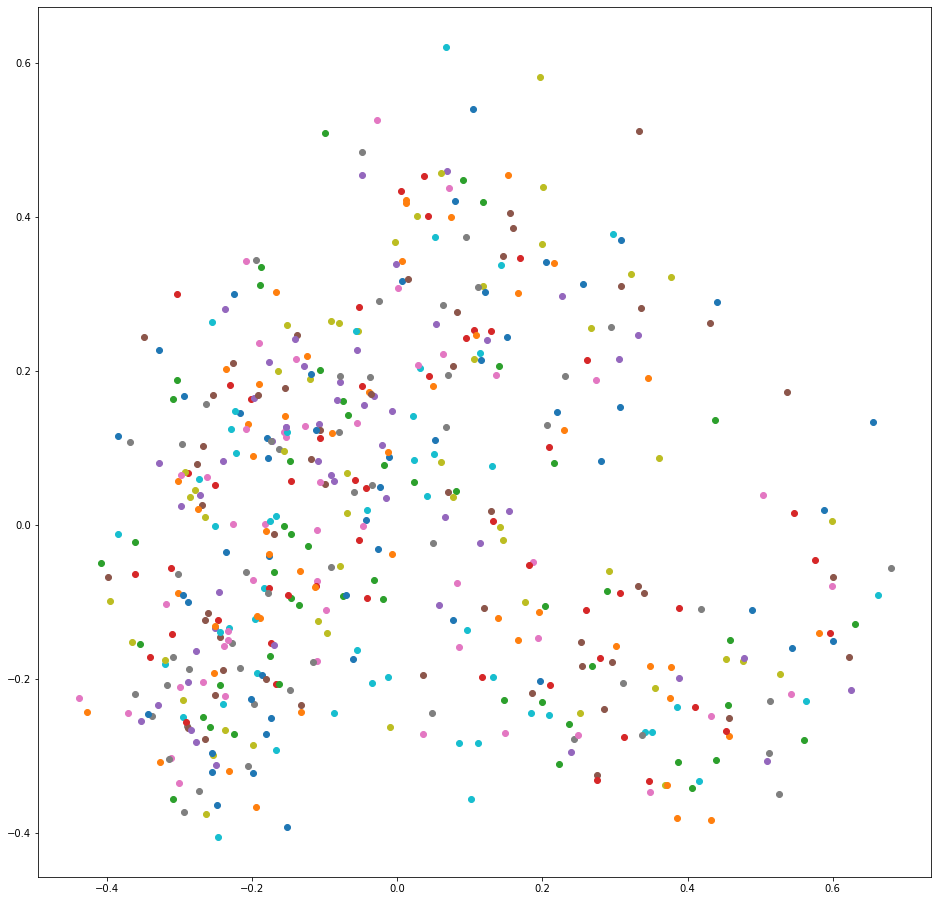

In [17]:
PCA_plot(emb)

In [18]:
# visualization code - PCA - 3D
from sklearn.decomposition import PCA
def PCA_plot_3D(emb):
  pca = PCA(n_components=3)
  #Creates and PCA model and plots it
  principal_comp = pca.fit_transform(emb)

  x = []
  y = []
  z = []
  for value in principal_comp:
    x.append(value[0])
    y.append(value[1])
    z.append(value[2])
        
  plt.figure(figsize=(16, 16)) 
  # Creating figure
  fig = plt.figure(figsize = (16, 16))
  ax = plt.axes(projection ="3d")
  
  # Creating plot
  ax.scatter3D(x, y, z, color = "blue")
  plt.title("simple 3D scatter plot")

  #Outputting all the embeddings
  #for i in range(len(x)):
    #plt.scatter(x[i],y[i])
  plt.show()


<Figure size 1152x1152 with 0 Axes>

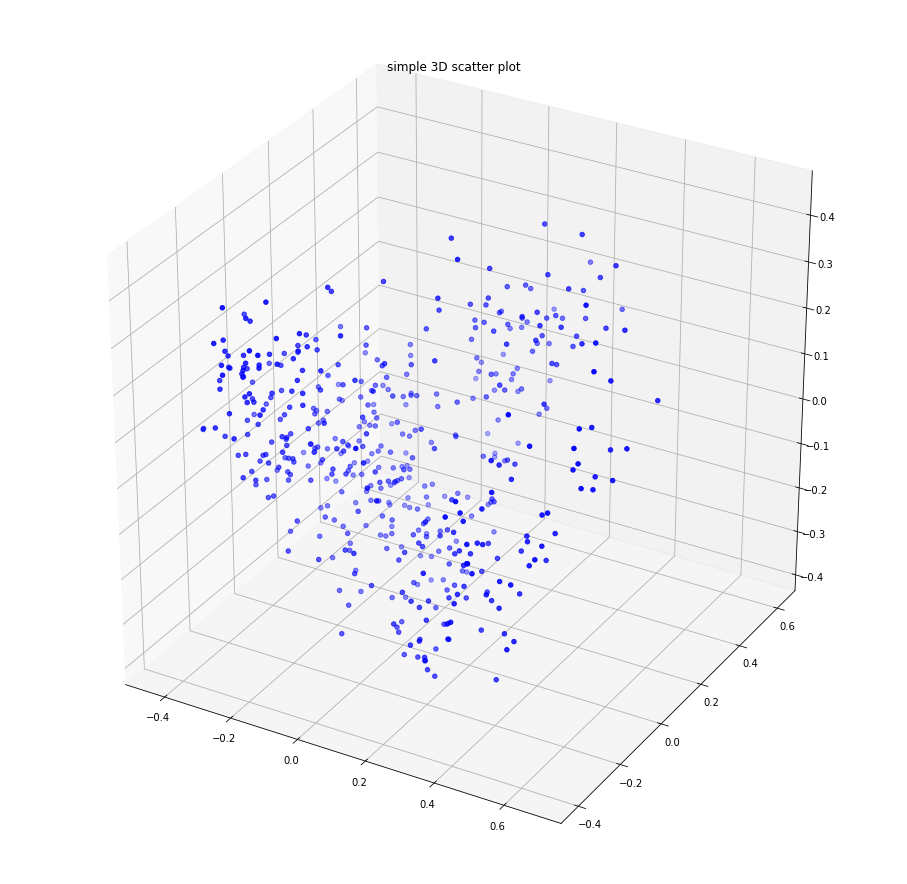

In [19]:
PCA_plot_3D(emb)

*Using 512 embedding from Google Model*

In [23]:
concepts = [item['name'] for item in inp]


In [29]:
concept_vectors = np.array(model(concepts))

In [34]:
with open('vector_512.npy', 'wb') as f:
    np.save(f,concept_vectors)

In [35]:
files.download('vector_512.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

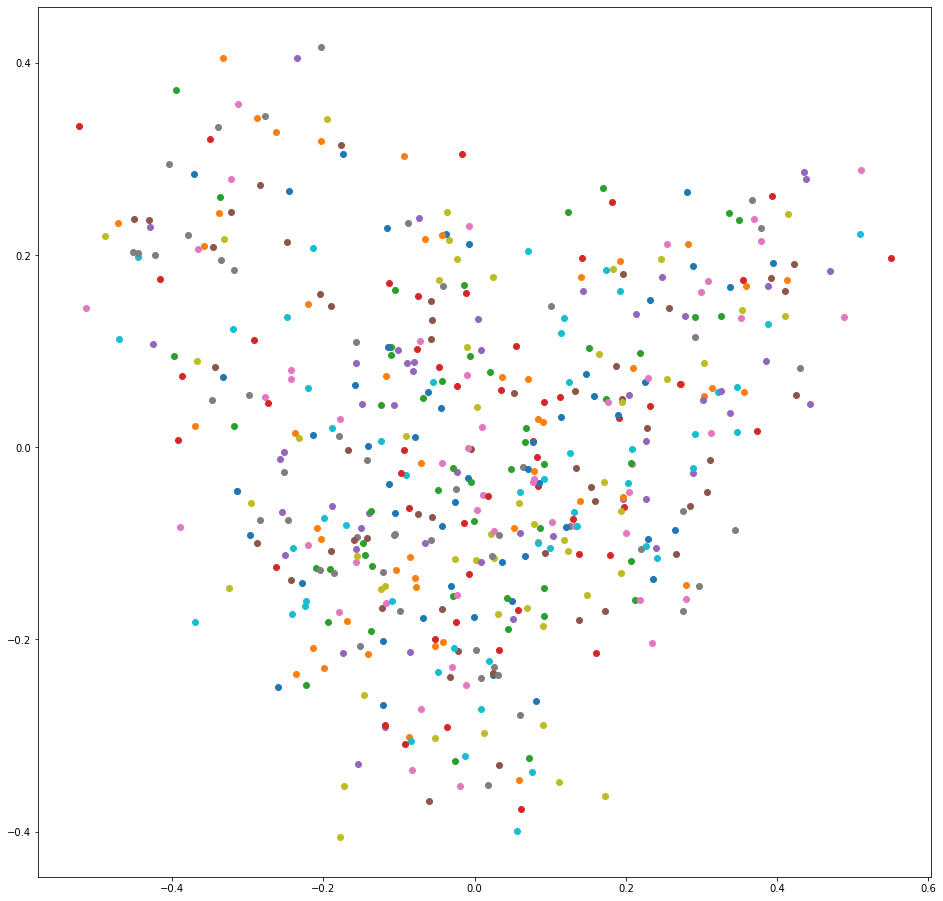

In [32]:
PCA_plot(concept_vectors)

<Figure size 1152x1152 with 0 Axes>

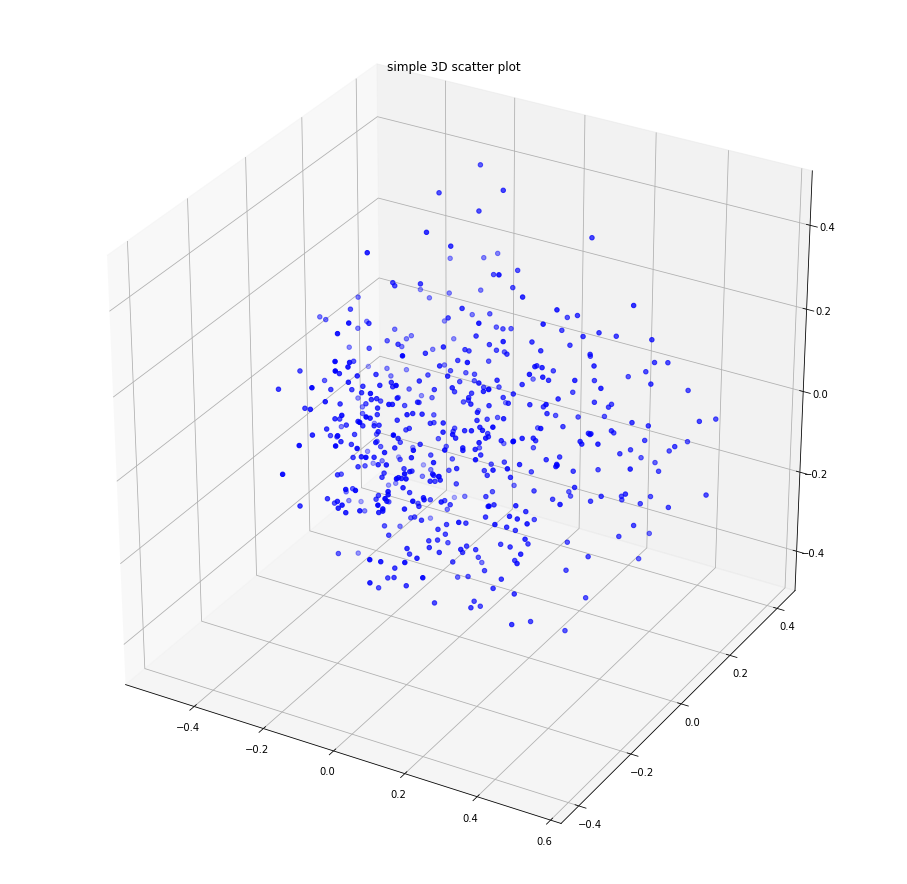

In [33]:
PCA_plot_3D(concept_vectors)

# *USEFUL CODE SNIPPETS*

**Summarization**

In [1]:
%%capture
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
import pprint

In [ ]:
summarizer = pipeline("summarization")

In [ ]:
summaries = []
for item in out:
  summaries.append(summarizer(item, max_length=50, do_sample=False, devvice = 1)[0]['summary_text'])

In [ ]:
new_summaries=list(summaries)

In [ ]:
pp.pprint(new_summaries[:2])

In [ ]:
df_out = pd.DataFrame(new_summaries, columns=['Summaries'])
df_out.to_csv('summaries1.csv',index=False, sep=',')

In [ ]:
df_out.head(5)

In [ ]:
#using Google Universal encoder to get embeddings:
res = embed(new_summaries)

In [ ]:
res_np = res.numpy()

In [ ]:
#creating tsv format
tmp = '\t'.join(str(x) for x in res.numpy()[0])

In [ ]:
# Save embeddings in tsv file.

with open('vectors.tsv', "w") as f:
  for vec in res_np:
    tmp = '\t'.join(str(x) for x in vec)
    f.write("{}\n".format(tmp))

In [ ]:
with open('metadata.tsv', "w") as f:
  for label in new_summaries:
    f.write("{}\n".format(label))

In [ ]:
files.download('vectors.tsv')

In [ ]:
test_input = """ Quite a ruby red hue... deep, rich, almost sporting a soft glow. There's a bit of a sandy colour in the head. 
Not much for lacing, but the glass seems to be playing a role in that, as it has had a couple different brews in it, all of which laced poorly. 		
S + T: I thoroughly enjoy a good rauch, and this one performs quite well in the traditional 'ham and cheese sandwich' sense. 
It's not overly smoky, which is a positive thing in that it allows some of the other delicate scents and flavours to shine. Of those, 
I pick up on a light - but noticeable - fruitiness, both in nose and on the palate that seems a little odd. 		
worth note: after writing the above, I noticed the print on the side of the bottle to see that cherry wood is used in addition to beechwood. 
That would explain the fruitiness noted. 		M + D: Body feels a little lighter in the mouthfeel, but seems to pick up a little weight 
after going down, however little sense that might make. The alcohol content is perhaps a little high, but a little slower sipping never 
hurt anyone. Not a bad take on the style, though I think I personally would have enjoyed it better if the actual smokiness were a touch 
more robust.
"""

In [ ]:
pp.pprint(summarizer(test_input, max_length=100, min_length=20, do_sample=False))

In [ ]:
test = """appearance: Wow very active beer with a haze through it. The white lace does stay on top forever it felt like. 		
Smell: Hoppy with needles. It really is a classic lager smell		Taste: Clean with off flavor on the back end that 
I just can't put my finger on it. someone help me with it....		mouthfeel is bad. It burns there is so much carbonation. 
I just can't do it. It honestly sent my taste-buds into shock on the first drink there was so much activity on my tongue. 		
I found myself wanting to rank it higher but it just wasn't there to get the higher rating.
Review from BeerAdvocate Magazine Issue #42 (Jul 2010): 		YES! More craft brewers need to adjunct their beer. The lacing has staying power, though the haze on the yellow is distracting. This lager packs a yeasty, grassy aroma. Crisp and a bit slick, obvious light body. Fresh- cut grass and nutty yeast coat the palate; hops are fresh with ample bitterness and a good amount of flavor, which brings this beer up a few notches. The maltiness is a bit light, but right where it's supposed to be. Flavor overrides cleanliness. Very drinkable as well.
22 picked up at Brewforia on the way home from work. Poured into my big Shorts Imperial Pint (thanks Kevin).		Foamy 1" white head dies back into nice lacing... no real retention though... okay cap... the brew is very pale golden with seemingly a lite haze of some sort.		Clean grains... little else.. a bit husky and traces of sulfur if I really concentrate.		Again... very clean.... pale malts... a bit doughy.		Slightly better than expected body and carbonation.		Meh... okay I guess... good for what it is... tastes pretty fresh and crisp.		3.5/3/3.5/3.5/4.5
Bomber pours a clear straw yellow body with a small vanilla head that quickly drops into some scattered lacing.		Aroma has some crackery malt and a hint of floral hops.		Mouthfeel is light bodied with a spritzy carbonation.		Taste is dominated by a crackery pilsner type maltiness that is balanced by a dry grassy and floral hoppiness. Reminds me of kolsch.		Unpretentious and unoffensive. A decent lawn mower beer, I suppose.
A - Two plus fingers of big chunky fizzy effervescent pure white head... Pretty impressive retention, especially by Adjunct Lager standards... An extremely pale slightly hazy golden straw color... A moderate bit of moderate paced carbonation swirls throughout... 		S - Cracker... Cereal... Doughy... Grainy... A touch of honey and a kiss of lemon... 		T - Dominated by pale malts... Bready... Grainy... Cracker... Lemon zest... Just the slightest presence of honey... Just an allusion of light pilsneresque hops... 		M - Medium bodied... A muted carbonation bite... Slightly chewy... Crisp... Mildly refreshing... 		D - Quaffable... Nothing to write home about, but slightly more drinkable than your average Adjunct Lagers.... As simple and straight forward as they come... Doesn't challenge the palette or any of the senses, but every once in a while that's okay...
Appearance - Pours a pale golden color with about a finger of quickly dissipating head that leaves little lacing on the edges of the glass.		Smell - Light hops, grainy malts, breadyness.		Taste - Taste is similar to the nose with a hint of caramel/honey. Nothing really stands out to me as special, but then again what do you expect with the description on the side of this.		Mouthfeel - Light bodied, prickly carbonation.		Drinkability - Quite drinkable to be honest, however as someone else stated, might as well buy some PBR's rather than spend money on this.
220z bomber poured into a pint glass.		A: Pours yellow and fizzy - nothing special here.		S: Smells decent, like a typical mid-range lager.		T: I was really expecting a lager with a bit of hop to it, judging by the name - "Lawnmower Lager" thinking it might be a little grassy (hoppy), much to my dismay this couldn't be further from the truth. There's a weird overwhelming honey malt flavor that is out of balance and I really don't get a nice lager flavor at all. It really reminds me of that cheap beer - "Oregon Honey Beer". Nothing special at all, and especially at $5.00 a bottle.		M: Light bodied and fizzy as hell. 		D: It's actually quite drinkable and probably it's greatest quality, but at $5.00 a bottle - give me a break.
Pours a clear very light yellow with strong carbonation but a weak head. The aroma is sweet, non-descript malt with just a touch of grassy hops and some graininess. The flavor is quite similar with pale malt sweetness, some grassy herbal hops, clean yeast, grainy notes and a surprising amount of bitterness. I have to say that the flavor is pretty disappointing, even for this style, though the dryness does give it some merit. Mouthfeel is not just light, but watery. It has a nice dry finish and is very quaffable, and holds up alright when compared to other beers in this category, but I think there are better options.
22 oz. bomber,		A: Pours a pale yellow, soft white head, fairly good retention per the style.		S: Some grainy malt notes, light hops, mild inoffensive nose.		T: Direct pilsner esque barley malt flavour, light hopping. Again, mild but the malt flavour is good.		M: Light-bodied, crisp, very clean, refreshing.		D: A solid pale lager, not as much flavour as I wanted, maybe akin to Full Sail Session is what I was looking for. As an innocuous easy drinking lager it did its job.
Saw this at the store for a great price (2 bucks for a 22oz bottle) and picked it up.		A- A clear pale straw yellow, very clear and clean. Very little head but then again most beers of this style don't have much head so in comparison to the style it is good. 		S- This has your typical lager yeast smell. There is a bready, earthy, grainy and gritty smell. Very rounded and bold smells in terms of beer of this style.		T- The beer is crisp and refreshing. I'm getting a big grain taste that is like chewing on the top of a barley stalk. More like the smell of when a grain truck dumps its freshly harvested barley load into the grain grate to be weighed and priced, take that smell and put it as a taste and that's what I'm getting. There is a subtle sweet honey taste that is coming though and adds a nice level of flavor. There is actually a nice complexity going on with this beer, especially when you are comparing it to other beers of the style. 		M- Good mouthfeel, nice carbination and a very light body.		D- Easy to drink, the name of the beer fits very well. I would drink this after working out in the yard no prob. This is clean but not BMC clean. It's more like clean but in a dirty glass type clean. 		Lagers are not my favorite styles of beer. But one thing I've found is that the flavors are more subtle then other styles. Many craft lagers get a bad wrap because of BMC lagers and how many people are so against them here on BA. I rated this beer based on its style, and for its style it is very well done and tasty. I would definitely buy this one again.
Poured a very pale yellow. No head whatsoever. Some bready aroma, but very light. Very faint lemony flavor. Extremely light malt flavors that finished with a distinct light beer aftertaste. 	This beer shoud've been labeled as a light beer. Shame on me for buying a lager with an ABV less than 4. Almost any mass produced light beer is better than this one. I even drank it after mowing my lawn. Should've had a tall glass of water.
22 oz bomber. Slight aroma of bread, light whiffs of cheese for some reason. Ugly looking beer..insipid pee colour..least the small white head hangs around. Taste papery, bread, some lemongrass. Really very little to it Macro-lager palate to it..average. Overall pretty bad stuff here.' Get a 40 of MHL or PBR save you money.
Pours clear gold with one finger of fluffy white head. Minor lacing. Aroma is slightly corny, some bread from the yeast. Taste is malty and just a hint of hop bitterness. Clean and full bodied for the style. Moderate carbonation. Clean, sweet, and some mild bitterness in the finish. Served a bit warmer than the style calls for. Still prefer Full Sail Session beer for mowing lawns but if Caldera were to can this beer I would drink some on a hot day by the pool or mowing the yard. I like the fact that it is 3.9% abv. Good beer for such a low alcohol content. Really a "light lager". And in that category it is a winner. I paid $3.09 for a bomber which is too expensive for lawnmower beer. Let's see if they can this brew. I would buy it over the macros if it was about $5.99 a sixer.
Let me start by sharing what's on the side of the bottle: "For all you people who are afraid of beer you can't see through, this one is for you. This beer is yellow, fizzy, and clearly meant for washing dirt out of your mouth after mowing the lawn." I'm not even sure it's good for that. It's definitely yellow and fizzy, with no head to speak of, and zero lacing. It almost smells like a loaf of bread, and nearly tastes the same. It's very earthy and grainy with nary a hop to be found. Man, I love me some Caldera, but I would rather drink a Bud Light than this on a hot summer day. Sorry guys, but this beer gets an F."""

In [ ]:
len(test.split())

In [ ]:
test1 = ' '.join(test.split()[:600])
test2 = ' '.join(test.split()[600:1200])
test3 = ' '.join(test.split()[1200:1644])

In [ ]:
test2 = ' '.join(test.split()[600:1200])

In [ ]:
question_answerer = pipeline("question-answering")

In [ ]:
result = question_answerer(question="What are the flavors?", context= test)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}")

In [ ]:
pp = pprint.PrettyPrinter(width=70)
pp.pprint(summarizer(test1, max_length=100, do_sample=False))
pp.pprint(summarizer(test2, max_length=100, do_sample=False))
pp.pprint(summarizer(test3, max_length=100, do_sample=False))

In [ ]:
test_sum = (' BeerAdvocate Magazine Issue #42 (Jul 2010): YES! '
                  'More craft brewers need to adjunct their beer . '
                  'The lacing has staying power, though the haze on '
                  'the yellow is distracting . Taste dominated by a '
                  'crackery pilsner type maltiness balanced by a dry '
                  'grassy and floral hoppiness .'' The aroma is sweet, non-descript malt with just '
                  'a touch of grassy hops and some graininess . The '
                  'flavor is quite similar with pale malt sweetness, '
                  'some grassy herbal hops, clean yeast, grainy '
                  'notes and a surprising amount of bitterness . It '
                  'has a nice dry finish and is very quaffable, but '
                  'I think there are better options .'' The aroma is sweet, non-descript malt with just '
                  'a touch of grassy hops and some graininess . The '
                  'flavor is quite similar with pale malt sweetness, '
                  'some grassy herbal hops, clean yeast, grainy '
                  'notes and a surprising amount of bitterness . It '
                  'has a nice dry finish and is very quaffable, but '
                  'I think there are better options .')

In [ ]:
test_sum

In [ ]:
pp.pprint(summarizer(test_sum, max_length=100, do_sample=False))

In [ ]:
concepts = ['Kindle','Amazon','apps','tablet','Kindle Fire','purchase','Kindle Fire HD','iPad','device','download']
concept_vectors = np.array(model(concepts))

In [ ]:
distance.cosine(concept_vectors[0],concept_vectors[4])

In [ ]:
concept_data = np.load('concept_vector.npz')
concept_data['vect'].shape

In [ ]:
distance.cosine(concept_data['vect'][4],concept_data['vect'][9])

In [ ]:
#concept_vectors.shape
a=np.zeros((90,512))
concept_vectors_padded = np.concatenate((concept_vectors,a), axis=0); concept_vectors_padded.shape

In [ ]:
str1 = 'I\'m no good'
str2 =  "I'm no good"
str3 = 'I am no good' 
inp = [str1,str2,str3]

In [ ]:
out = np.array(model(inp))

In [ ]:
distance.cosine(out[0],out[1])

In [ ]:
!unzip file_location

In [ ]:
for item in data:
  re.sub('\n+', ' ' item['text'])

**files upload & downloads**

In [ ]:
# file upload while using Google Colab
from google.colab import files
uploaded = files.upload()
files.download('vectors.tsv')

#files reads&writes
with open('beer_concept.json') as f:
  inp = json.load(f)

import json
with open('beer_concept_500.json', 'w', encoding='utf-8') as f:
  json.dump(res_['result'], f, ensure_ascii=False, indent=4)

!unzip "/content/drive/path/input_file_name.zip" -d "/content/drive/path/output_folder/"  
